# Imports and reading the dataset

In [56]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt    
import warnings
warnings.filterwarnings('ignore')

## Study the dataset

In [195]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [197]:
df.shape

(891, 12)

## Check and handle missing and duplicate values

In [198]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

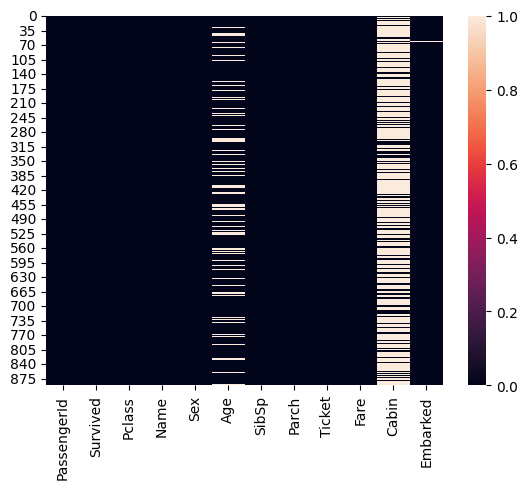

In [199]:
sns.heatmap(df.isna())

In [200]:
print('The percentage of missing data in Cabin is :',df['Cabin'].isna().sum()/len(df['Cabin']) *100)

The percentage of missing data in Cabin is : 77.10437710437711


In [201]:
df.drop(columns = 'Cabin', inplace = True)

In [202]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot: xlabel='Age', ylabel='Sex'>

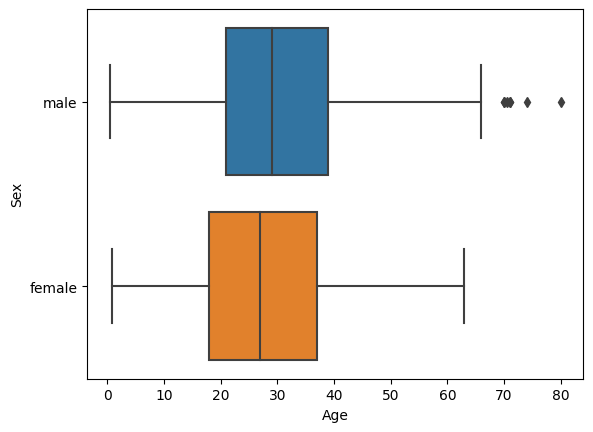

In [203]:
sns.boxplot(data = df, x = 'Age', y = 'Sex')

# we can observe that Males have more age than females
# majority of males are nearing 30 years
# majority of females are nearing 27 years
# we impute the missing columns with those 2 values checkingt he sex of the row

In [204]:
#impute age = 30 if males else 27

def impute_age(cols):
    Age = cols[0]
    Sex = cols[1]

    if pd.isnull(Age):
        if Sex == 'male':
            return 30
        else:
            return 27
    else:
        return Age

In [205]:
# use the above function

df['Age'] = df[['Age','Sex']].apply(impute_age,axis = 1)

In [206]:
df.dropna(inplace = True)

In [207]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [208]:
df.duplicated().sum()

0

### Now our dataset has no missing and duplicated values

In [209]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [75]:
df.drop(columns = ['Name', 'Ticket'], inplace = True)

# Performing EDA

In [74]:
EDAdf = df.copy()

In [96]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,27.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


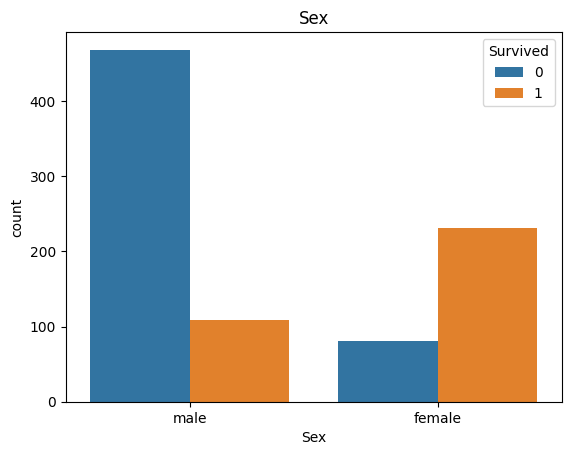

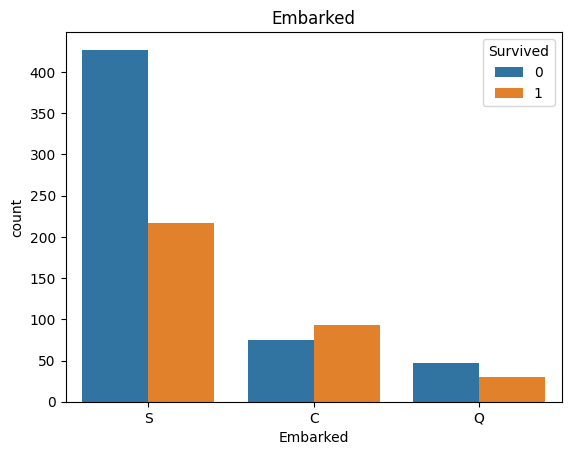

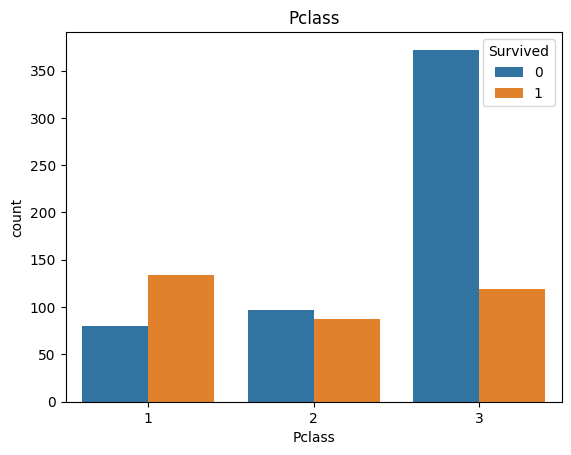

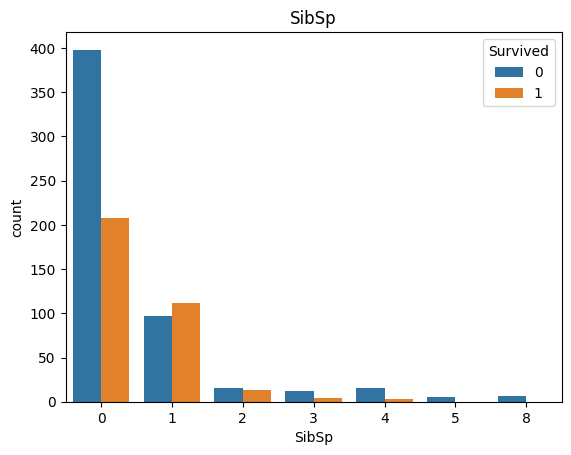

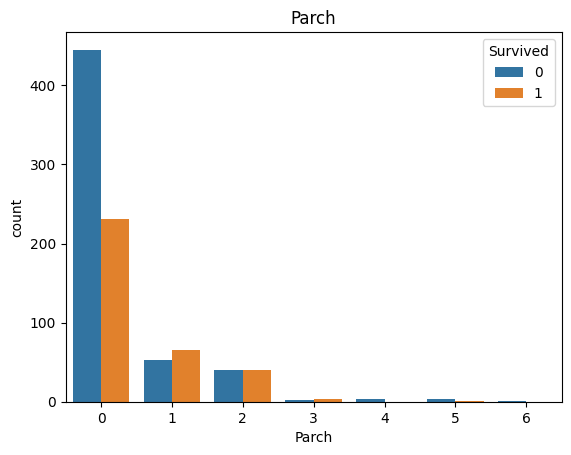

In [99]:
categorical_cols = [ 'Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

for col in categorical_cols:
    sns.countplot(data = df, x = col, hue = 'Survived')
    plt.title(col)
    plt.show()

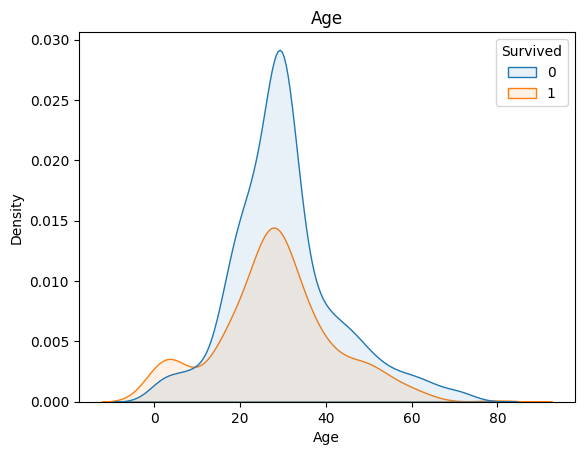

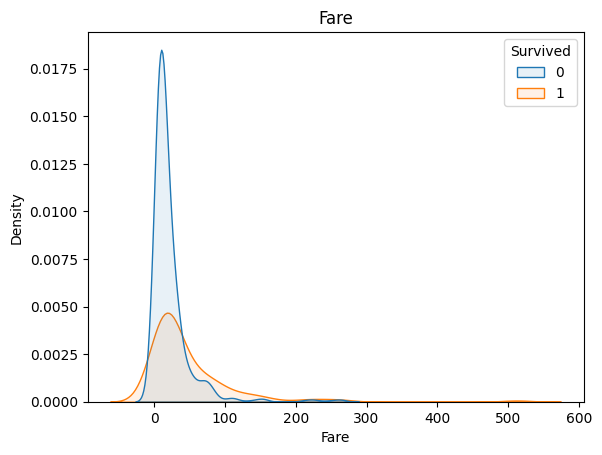

In [103]:
numerical_cols = ['Age', 'Fare']

for i in numerical_cols:
    sns.kdeplot(data = df, x = i, hue = 'Survived', fill = True, alpha = 0.1)
    plt.title(i)
    plt.show()

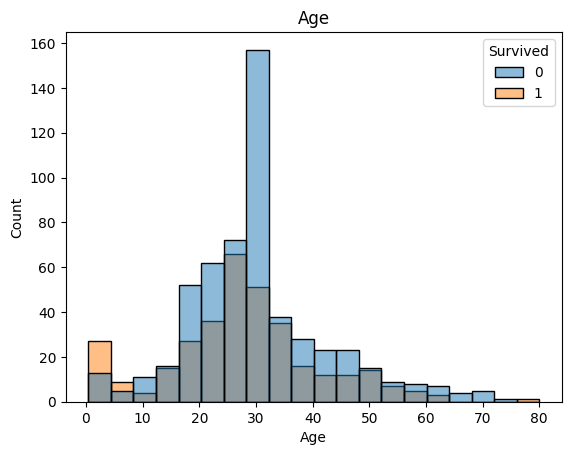

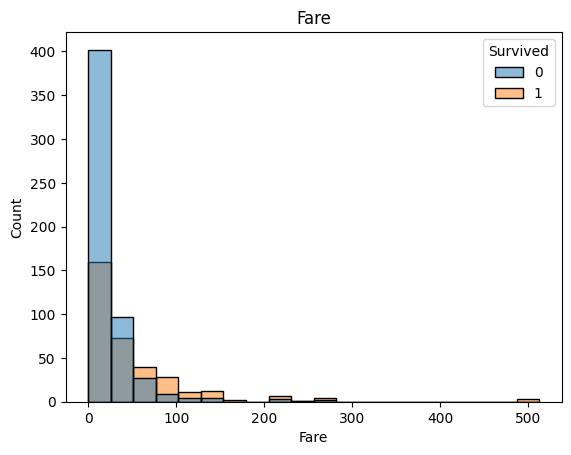

In [109]:
for i in numerical_cols:
    sns.histplot(data = df, x = i, hue = 'Survived', bins = 20)
    plt.title(i)
    plt.show()

<AxesSubplot: >

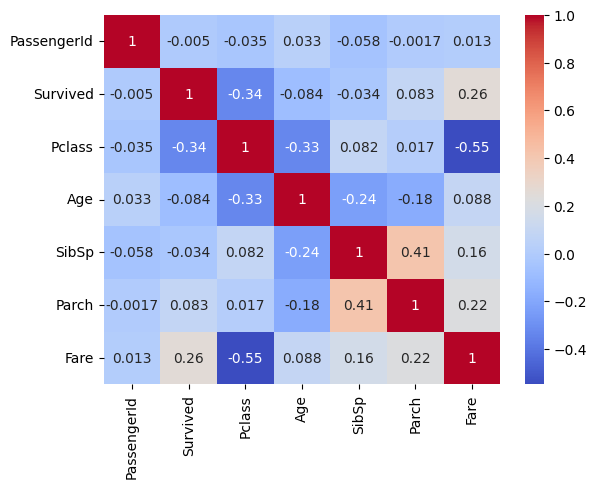

In [115]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

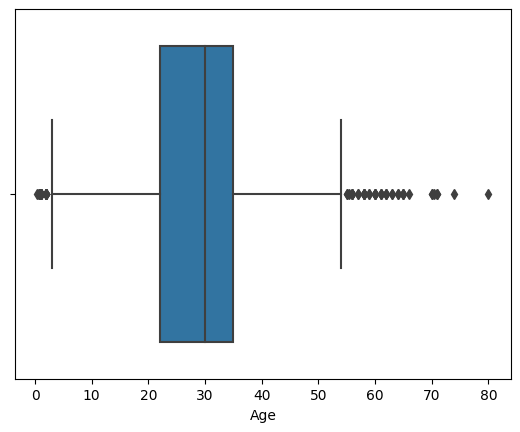

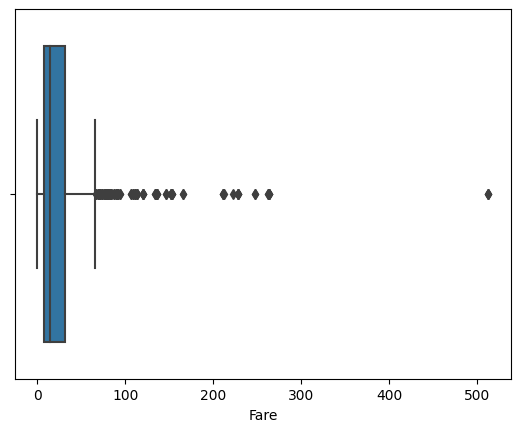

In [127]:
for col in numerical_cols:
    sns.boxplot(data = df, x = col)
    plt.show()

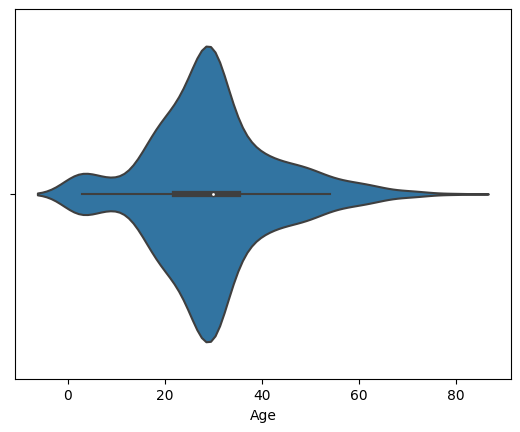

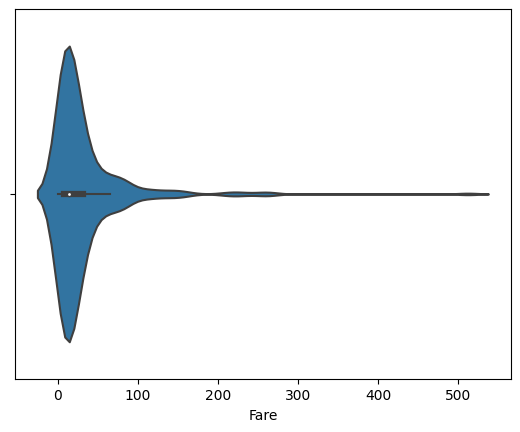

In [128]:
for col in numerical_cols:
    sns.violinplot(data = df, x = col)
    plt.show()

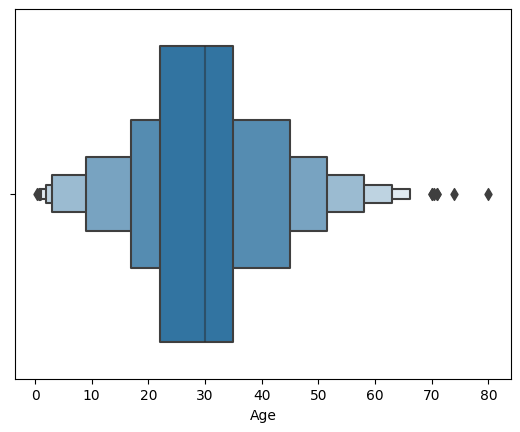

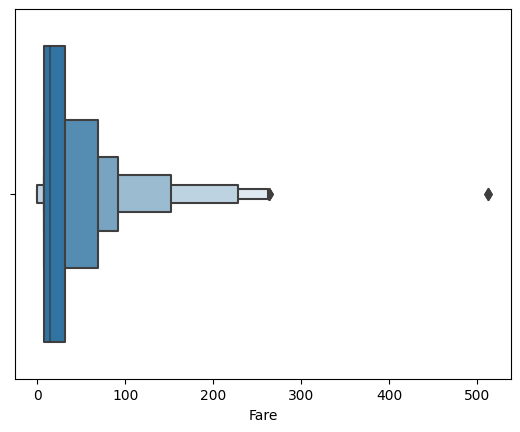

In [129]:
for col in numerical_cols:
    sns.boxenplot(data = df, x = col)
    plt.show()

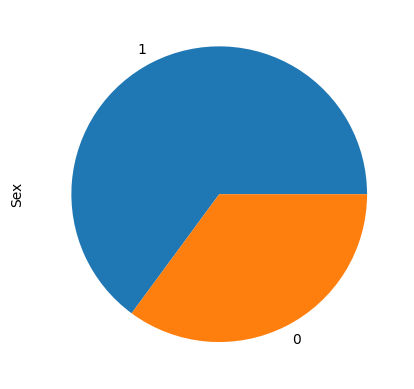

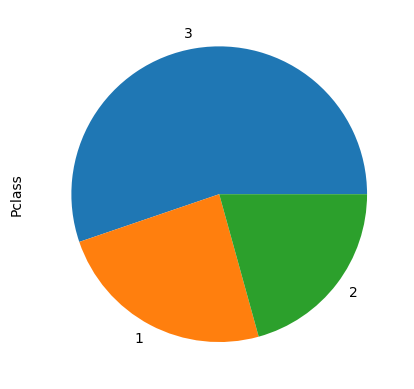

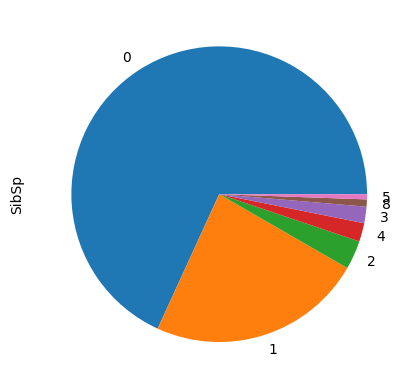

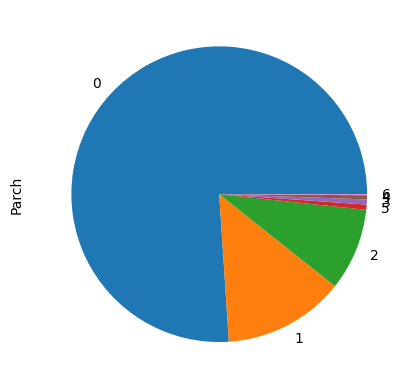

In [134]:
# piecharts for categorical cols
categorical_cols = ['Sex', 'Pclass', 'SibSp', 'Parch']
for col in categorical_cols:
    df[col].value_counts().plot(kind = 'pie')
    plt.show()

In [136]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,27.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


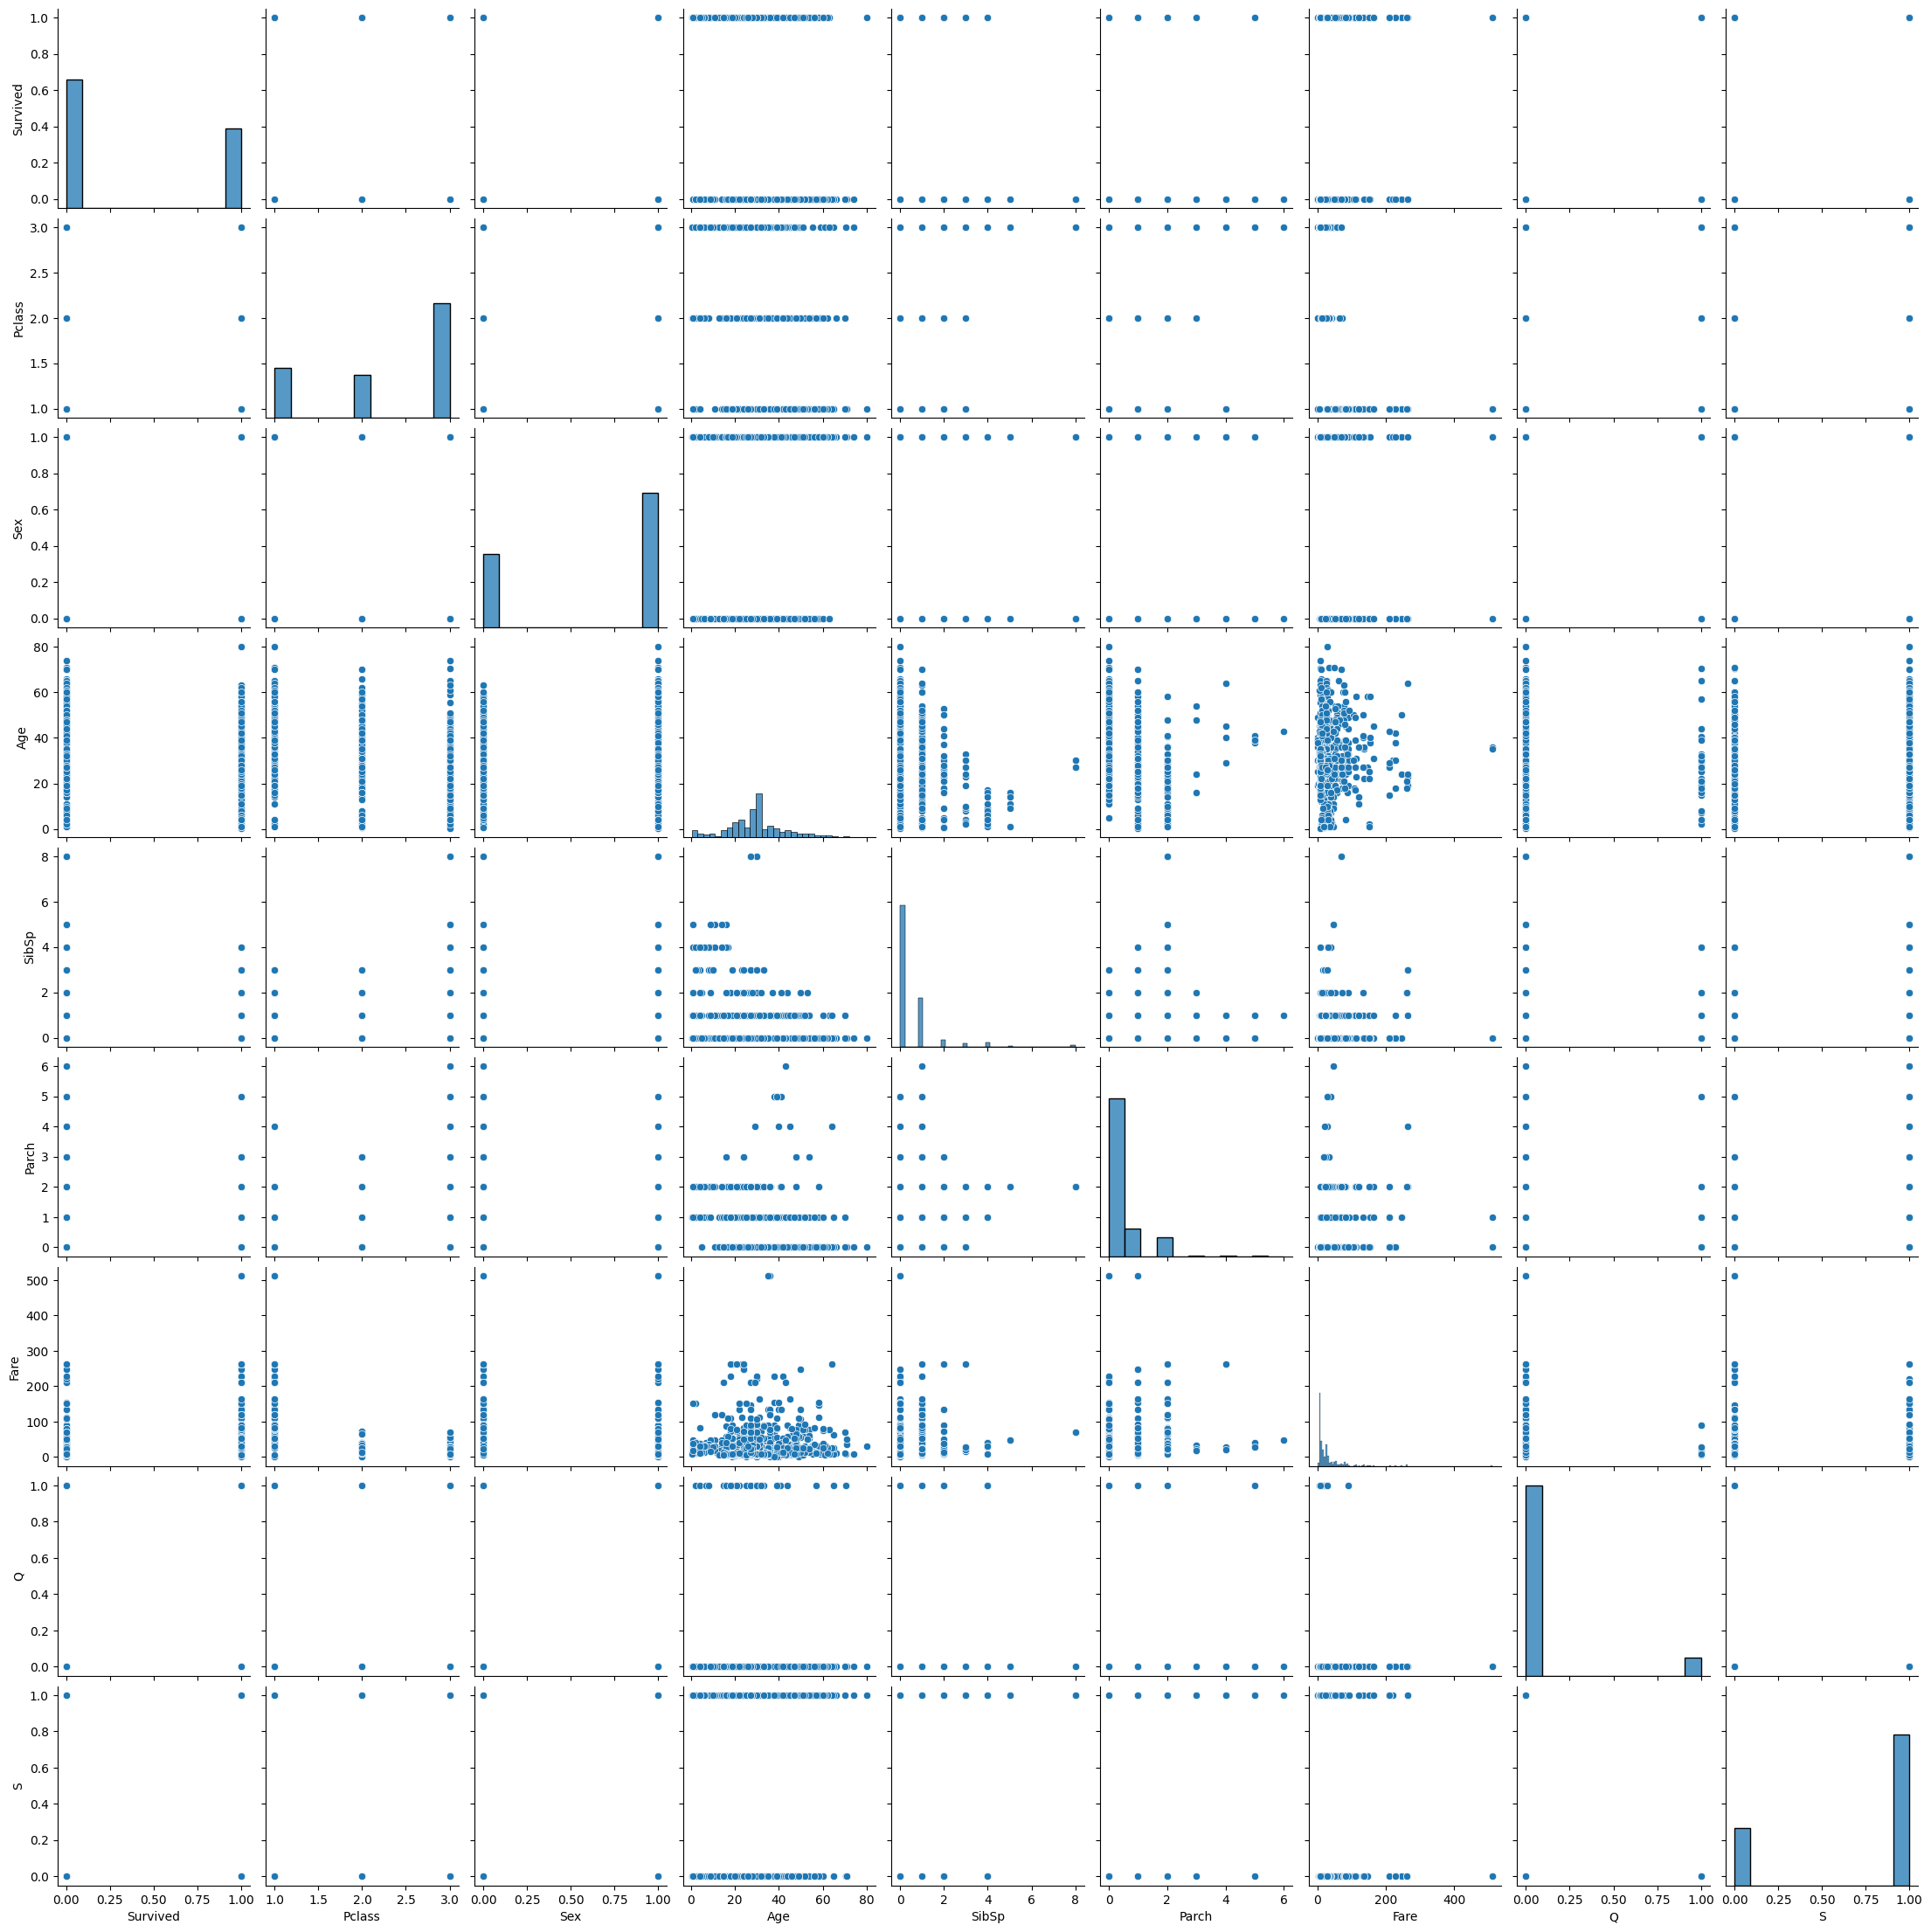

In [135]:
sns.pairplot(df)

In [121]:
dfbkp2.drop(columns = 'Embarked', inplace = True)

In [122]:
df = dfbkp2.copy()

In [124]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [23]:
df.drop(columns = ['Ticket', 'Name', 'PassengerId'], inplace = True)

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
dfbkp = df.copy()

In [45]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,27.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [49]:
#df['Sex'] = pd.get_dummies(df['Sex'], drop_first = True)
new = pd.get_dummies(df['Embarked'], drop_first=True)


In [51]:
df = pd.concat([df,new], axis = 1)

In [52]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S
0,0,3,1,22.0,1,0,7.2500,S,0,1
1,1,1,0,38.0,1,0,71.2833,C,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,1
3,1,1,0,35.0,1,0,53.1000,S,0,1
4,0,3,1,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,0,1
887,1,1,0,19.0,0,0,30.0000,S,0,1
888,0,3,0,27.0,1,2,23.4500,S,0,1
889,1,1,1,26.0,0,0,30.0000,C,0,0


In [53]:
dfbkp2 = df.copy()

# Deal with outliers

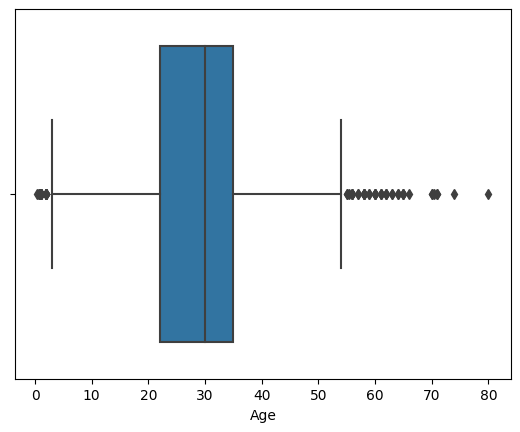

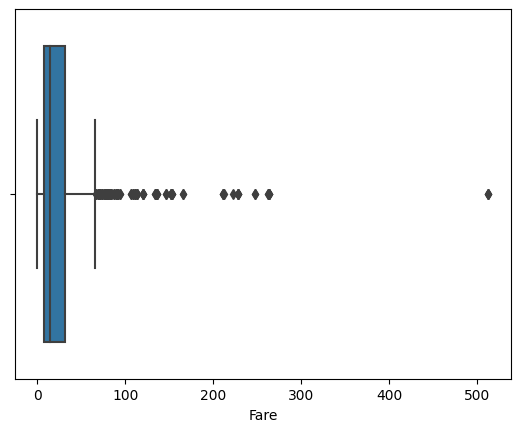

In [139]:
for i in numerical_cols:
    sns.boxplot(data = df, x = i)
    plt.show()

#### remove outliers from age

In [145]:
backup_before_outliers_removed = df.copy()

In [169]:
df = backup_before_outliers_removed.copy()

##### Outliers in Age

In [170]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)

IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
print(f'Upper limit of age = {upper_limit} \nLower limit of age = {lower_limit}')

Upper limit of age = 54.5 
Lower limit of age = 2.5


In [171]:
print('Total outliers in Age column are : ',((df['Age'] < lower_limit).sum() + ((df['Age'] > upper_limit) ).sum()))

Total outliers in Age column are :  65


In [172]:
# remove the outliers
df2 = df[(df['Age'] >= lower_limit) & (df['Age'] <= upper_limit)]

In [174]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,27.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


##### Outliers in Fare

In [175]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)

IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
print(f'Upper limit of Fare = {upper_limit} \nLower limit of Fare = {lower_limit}')

#As there are no values less than 0 we only need upper limit

Upper limit of Fare = 65.6563 
Lower limit of Fare = -26.7605


In [177]:
df3 = df2[df2['Fare'] <= upper_limit]

# Outliers Removed

In [178]:
df = df3.copy()

# Our Dataset is now completely ready to start building ML models

In [179]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
5,0,3,1,30.0,0,0,8.4583,1,0


In [180]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [186]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Scale the age and fare columns
X_scaled = sc.fit_transform(X[['Age', 'Fare']])
X[['Age', 'Fare']] = X_scaled

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate

In [229]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[187  32]
 [ 38  99]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       219
           1       0.76      0.72      0.74       137

    accuracy                           0.80       356
   macro avg       0.79      0.79      0.79       356
weighted avg       0.80      0.80      0.80       356



In [190]:
backup_before_outliers_removed

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,27.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


In [228]:
X = backup_before_outliers_removed.iloc[:, 1:]
y = backup_before_outliers_removed.iloc[:, 0]

lr2 = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 70)

lr2 = LogisticRegression()
lr2.fit(X_train, y_train)
y_pred = lr2.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[187  32]
 [ 38  99]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       219
           1       0.76      0.72      0.74       137

    accuracy                           0.80       356
   macro avg       0.79      0.79      0.79       356
weighted avg       0.80      0.80      0.80       356



In [193]:
lr2 = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

lr2 = LogisticRegression()
lr2.fit(X_train, y_train)
y_pred = lr2.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84 21]
 [29 44]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       105
           1       0.68      0.60      0.64        73

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.72       178



In [210]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [211]:
df.drop(columns = ['Name', 'Ticket'], inplace = True)

In [212]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [215]:
df['Sex'] = pd.get_dummies(df['Sex'], drop_first = True)

In [217]:
emb = pd.get_dummies(df['Embarked'], drop_first = True)
emb

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [218]:
df = pd.concat([df,emb], axis = 1)

In [219]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S
0,1,0,3,1,22.0,1,0,7.2500,S,0,1
1,2,1,1,0,38.0,1,0,71.2833,C,0,0
2,3,1,3,0,26.0,0,0,7.9250,S,0,1
3,4,1,1,0,35.0,1,0,53.1000,S,0,1
4,5,0,3,1,35.0,0,0,8.0500,S,0,1


In [221]:
df.drop(columns = 'Embarked', inplace = True)

In [222]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1


In [224]:
X = df.iloc[:, 2:]
y = df.iloc[:, 1]


In [232]:
lr5 = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

lr5 = LogisticRegression()
lr5.fit(X_train, y_train)
y_pred = lr5.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Final Accuracy : {accuracy_score(y_test, y_pred) * 100}')

[[151  21]
 [ 27  68]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       172
           1       0.76      0.72      0.74        95

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.82      0.82      0.82       267

Final Accuracy : 82.02247191011236


In [234]:
params = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
         'penalty' : ['l1', 'l2', 'elasticnet', 'none']}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(lr5, param_grid = params, cv = 5)
gs.fit(X_train, y_train)
gs.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [236]:
lr5 = LogisticRegression(C = 0.1, penalty = 'l2')
lr5.fit(X_train, y_train)
y_pred = lr5.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Final Accuracy : {accuracy_score(y_test, y_pred) * 100}')

[[155  17]
 [ 32  63]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       172
           1       0.79      0.66      0.72        95

    accuracy                           0.82       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.82      0.81       267

Final Accuracy : 81.64794007490637
